
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---

# Trabajo práctico entregable - Parte 2 (EJERCICIO 1 Y 2)

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
import scipy

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [ ]:
df[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                ...                     
                             count          mean  ...       75%        max
profile_gender                                    ...                     
Hombre                      4944.0  98836.063558  ...  110000.0  2080000.0
Mujer                        908.0  73501.414465  ...   92000.0   800000.0
Otros                         31.0  95441.354839  ...  117500.0   380000.0

[3 rows x 8 columns]

In [ ]:
df[df.salary_monthly_NETO > 1000]\
  [['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                 ...                     
                             count           mean  ...       75%        max
profile_gender                                     ...                     
Hombre                      4815.0  101481.624343  ...  110000.0  2080000.0
Mujer                        863.0   77328.913778  ...   93000.0   800000.0
Otros                         28.0  105660.714286  ...  122750.0   380000.0

[3 rows x 8 columns]

In [ ]:
alpha = 0.05

In [ ]:
is_man = df.profile_gender == 'Hombre'

groupA = df[(df.salary_monthly_NETO > 1000) & is_man].salary_monthly_NETO
groupB = df[(df.salary_monthly_NETO > 1000) & ~is_man].salary_monthly_NETO

## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB). 
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

### Cálculo de la longitud de los grupos





In [ ]:
longGroupA = len(groupA) 
longGroupB = len(groupB) 
print(longGroupA)
print(longGroupB)
#Obtener el subset de las restas

4815
891


### Estimador puntual basado en promedio

Se calcula a continuación el estimador puntual basado en el promedio 

Hemos elegido como variable aleatoria para trabajar las medias de los salarios de hombres, grupo A, y del resto, grupo B. Como no conocemos los parametros estadisticos verdaderos de la poblacion, solo podemos inferir algunos parametros a partir de las muestras del grupo A y B que disponemos. 
Luego, la distribucion de la diferencia de las medias también tendrá distribución normal de acuerdo con la sección 9.1 del libro de Devore. 
Luego, calculamos los valores medios correspondientes y su respectiva desviacion estandar:

In [ ]:
#Cálculo de las medias de las muestras:

mu_A=groupA.mean()
mu_B=groupB.mean()
mu=mu_A-mu_B


#Calculo de desviacion estandar (sigma) de grupo A, grupo B y resta de medias. 

S_a=groupA.std()
S_b=groupB.std()
S_ab=np.sqrt(S_a**2/len(groupA)+S_b**2/len(groupB)) # desviacion estandar de mu segun pagina 336 del Devore

print("Promedio Hombres:" , int(mu_A), 'Desviación estándar:', int(S_a) )
print("Promedio Resto:" , int(mu_A), 'Desviación estándar:', int(S_b))
print('Diferencia de las medias:', int(mu), 'Desviación estandar de la diferencia de las medias:',int(S_ab) )


Promedio Hombres: 101481 Desviación estándar: 102215
Promedio Resto: 101481 Desviación estándar: 56515
Diferencia de las medias: 23262 Desviación estandar de la diferencia de las medias: 2398


La estimación puntual de la diferencia de las medias de los salarios netos entre hombres y el resto es: $23.262

### Estimación por intervalo de confianza de nivel 1- alpha

Distribución de la muestra


In [ ]:
#seaborn.histplot(restaMedias, bins=25)
print ('promedio de la muestra=', mu, ', una realización del estadístico media muestral')

promedio de la muestra= 23262.37339991823 , una realización del estadístico media muestral


### Cálculo del intervalo de confianza

Según Devore (pp 337) el intervalo de confianza t con dos muestras para mu, con un nivel de confianza del 95% viene dado por IC= t_alfa,nu*S_ab donde nu son los grados de libertad que se calculan a continuacion y t_alfa,nu es entonces un valor tabulado. A continuacion se realizan los calculos:

In [ ]:

#Calculo de los grados de libertad: 
es_1=S_a/np.sqrt(len(groupA))
es_2=S_b/np.sqrt(len(groupB))
nu=int((es_1**2+es_2**2)**2/(es_1**4/(len(groupA)-1)+es_2**4/(len(groupB)-1)))

print('grados de libertad:',nu)
#calculo de intervalo de confianza del 95% segun Devore (pp 337)

#Luego, t_alpha_nu=1.645 #segun tabla A5 del Devore
t_alpha_nu=1.645
IC=1.645*S_ab

#Luego, el intervalo de confianza con un nivel del 95% es: 
print('Luego, el intervalo de confianza con un nivel del 95% es:')
print( int(IC))


grados de libertad: 2148
Luego, el intervalo de confianza con un nivel del 95% es:
3946


## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

Describir formalmente los distintos compenentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis Nula**

$H_0= La distribución de salarios es igual entre los grupos A y B

mu = 0 (Si es igual a cero las distribuciones son iguales)

$H_1 = La media del salario de hombres es mayor que la media del salario del resto.

mu > 0 (mu = mu_A - mu_B)

**Nivel de significancia**

95%

**Estadístico (Pivote)**
Dado que tenemos muestras de 2 poblaciones independientes, y que esas muestras tienen diferentes tamaños y diferentes varianzas realizaremos una prueba conocida como **Prueba t de Welch**. El valor del estadistico de prueba para este caso se define como sigue: 

t=mu/S_ab

Debemos comparar el valor de t con t_alpha,nu. Si t es mayor que t_alpha -> se cae en la región de rechazo y debemos entonces rechazar H_0. 



In [ ]:
t=mu/S_ab


#Comparo los valores de P y alpha.

RR= (t > t_alpha_nu)

if (RR == True):
  print('Se rechaza la hipótesis nula a un nivel de significancia de 0.05, entonces la media de salarios de hombres (grupo A) es efectivamente superior al del resto (grupo B).')
else:
  print('NO se rechaza la hipótesis nula')



Se rechaza la hipótesis nula a un nivel de significancia de 0.05, entonces la media de salarios de hombres (grupo A) es efectivamente superior al del resto (grupo B).


#### Tendencia de los datos de las muestras
Comparación de las muestras A y B con la distribución Normal

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


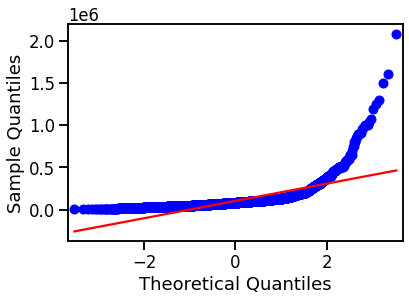

In [ ]:
from numpy.random import seed, randn
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

qqplot(groupA , line='s')
plt.show()


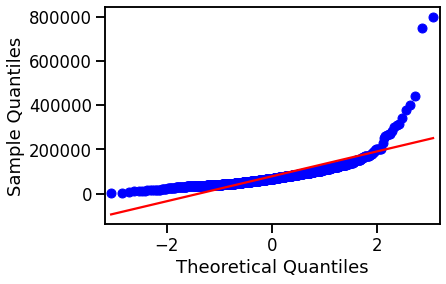

In [ ]:
qqplot(groupB , line='s')
plt.show()


### 2.2 P-valor

El valor P es el nivel de significación más pequeño al cual H_0 sería rechazada. Una vez determinado el valor P, debemos comparar el valor de P con alpha. 

Si Valor P <= alpha se rechaza H_0.
Si Valor P > alpha NO se rechaza H_0.

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.
3. Los dos grupos de nuestra muestra tienen tamaños muy distintos. ¿Esto afecta al tests?

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

#### Cálculo del P-valor

In [ ]:
#Calculamos P valor empleando scipy

pvalor = scipy.stats.ttest_ind(groupA, groupB)

print('Luego P-valor:',pvalor[1]) 

#Comparo los valores de P y alpha.

R= (pvalor[1] > alpha)

if (R == False):
  print('Se rechaza la hipótesis nula')
else:
  print('NO se rechaza la hipótesis nula')


Luego P-valor: 4.232993821653396e-11
Se rechaza la hipótesis nula


#### Interpretación del P-valor

Como dijimos previamente, dado que el valor P es menor que alpha, se rechaza la hipótesis nula con una significancia del 0.05. 


#### Tamaños de la muestra

Los tamaños diferentes de muestras NO afectan al cálculo. Pues hemos empleado el test de Welch que aplica para estos casos. 

### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

#### Cálculo de potencia del test
Cálculo del tamaño necesario de la muestra

In [ ]:
from statsmodels.stats.power import tt_ind_solve_power #PREGUNTARRRRRR

In [ ]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
nobs1= None  
alpha = 0.05
ratio = len(groupB) / len(groupA)
power =  [0.80, 0.90, 0.95]

In [ ]:
for i in power:
    print('Grupo A')
    cantidadMuestra=tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=i, ratio=ratio)
    print(cantidadMuestra)
    print('Grupo B')
    print(cantidadMuestra*ratio)

    

Grupo A
298.3073379956589
Grupo B
55.20079712443034
Grupo A
398.79610014029686
Grupo B
73.79591385773718
Grupo A
492.8117730249087
Grupo B
91.19320659713263


#### Interpretación

El tamaño requerido para el grupo A es: 492 y para el grupo B: 91 para un grado de confianza del 95%, por tal motivo el tamaño de la muestra original cumple los requisitos. 
Consideramos que la muestra es suficientemente grande para representar la tendencia general y que puede ser utilizada en un juicio.
